<p><h2 style="color:black">First things first</h2><p> I am going explore the data-set to see what interesting features i can target in this first analysis. I will be using this notebook as a "sand-box". This process will give me an idea of what functions i need to create in order to manipulate my data-set.</p>
<h6 style="color:green">Lets start by importing the dataset. This data-set was scraped from <a href="http://ufcstats.com">http://www.ufcstats.com</a> using the <a style="color:red">ufc_extraction.py</a> script in this project. This script scrapes fighter statistics and stores them in a <a style="color:red"> .json</a> file.

In [43]:
from src.data.dataMakers import dataMakers
dm = dataMakers()
fighters = dm.make()
fighters[0:2]

[{'url': 'http://ufcstats.com/fighter-details/93fe7332d16c6ad9',
  'name': 'Tom Aaron',
  'wins': 5,
  'draws': 3,
  'losses': 0,
  'height': None,
  'weight': 155.0,
  'reach': None,
  'stance': None,
  'dob': '7-13-1978',
  'slpm': 0.0,
  'stracc': 0.0,
  'sapm': 0.0,
  'strdef': 0.0,
  'tdavg': 0.0,
  'tdacc': 0.0,
  'tddef': 0.0,
  'subavg': 0.0},
 {'url': 'http://ufcstats.com/fighter-details/15df64c02b6b0fde',
  'name': 'Danny Abbadi',
  'wins': 4,
  'draws': 6,
  'losses': 0,
  'height': 5.92,
  'weight': 155.0,
  'reach': None,
  'stance': 'Orthodox',
  'dob': '7-03-1983',
  'slpm': 3.29,
  'stracc': 38.0,
  'sapm': 4.41,
  'strdef': 57.0,
  'tdavg': 0.0,
  'tdacc': 0.0,
  'tddef': 77.0,
  'subavg': 0.0}]

<p><h6 style="color:green">Great! we can print the first 2 fighters which means the <a style="color:red">make()</a> function from the <a style="color:red">make_dataset</a> module is running smoothly. All this function does is extract the data from the extracted <a style="color:red">fighters.json</a> file.</p> Now lets explore the size of this list. AKA the number of fighters in the data-set. 

In [19]:
len(fighters)

3323

<h6 style="color:green">
    We can see that the data-set is not absurdly large, therefore
    we can use a simple <a style="color:red"> Pandas DataFrame </a> to manipulate this data.
</h6>

In [20]:
from pandas import DataFrame, Series
import pandas as pd
fighterFrame = pd.DataFrame(fighters)

print(fighterFrame[0:4])

         dob  draws  height  losses                 name  reach  sapm  slpm  \
0  7-13-1978      3     NaN       0            Tom Aaron    NaN  0.00  0.00   
1  7-03-1983      6    5.92       0         Danny Abbadi    NaN  4.41  3.29   
2       None     14    6.00       0         David Abbott    NaN  3.55  1.35   
3  9-02-1981      4    6.25       0  Shamil Abdurakhimov   76.0  2.36  2.64   

     stance  stracc  strdef  subavg  tdacc  tdavg  tddef  \
0      None     0.0     0.0     0.0    0.0   0.00    0.0   
1  Orthodox    38.0    57.0     0.0    0.0   0.00   77.0   
2    Switch    30.0    38.0     0.0   33.0   1.07   66.0   
3  Orthodox    44.0    60.0     0.2   24.0   1.34   66.0   

                                                 url  weight  wins  
0  http://ufcstats.com/fighter-details/93fe7332d1...   155.0     5  
1  http://ufcstats.com/fighter-details/15df64c02b...   155.0     4  
2  http://ufcstats.com/fighter-details/b361180739...   265.0    10  
3  http://ufcstats.com/figh

<h2 style="color:black">
    First question: how does the distribution of fighters's weight division look like?
</h2>
<ul>
    <li>Strawweight:115 lb</li>
    <li>Flyweight: 115-125 lbs</li>
    <li>Bantamweight: 125-135 lbs</li>
    <li>Featherweight: 135-145 lbs</li>
    <li>Lightweight 145-155 lbs</li>
    <li>Welterweight 155-170 lbs</li>
    <li>Middleweight: 170-185 lbs</li>
    <li>Light Heavyweight: 185-205 lbs</li>
    <li>Heavyweight: 205-265 lbs</li>
</ul>
<h6 style="color:green">Lets create a function that counts the number of fighters in each sub-division<h6>

In [3]:
def get_subdivisions_count(dataset):
    
    counts = {
            "strawweight":0,
            "flyweight":0,
            "bantanamweight":0,
            "featherweight": 0,
            "lightweight":0,
            "welterweight":0,
            "middleweight":0,
            "light heavyweight":0,
            "heavyweight":0,
            "no data":0
        }
    
    for fighter in dataset:
        
        try:
            fighterWeight = int(fighter['weight'])
        except TypeError:
            counts['no data'] +=1
            continue
        
        if 0 < fighterWeight <= 115:
            counts['strawweight'] +=1
            
        elif 115 < fighterWeight <= 125:
            counts['flyweight'] +=1
            
        elif 125 < fighterWeight <= 135:
            counts['bantanamweight'] +=1
            
        elif 135 < fighterWeight <= 145:
            counts['featherweight'] +=1
            
        elif 145 < fighterWeight <= 155:
            counts['lightweight'] += 1
    
        elif 155 < fighterWeight <= 170:
            counts['welterweight'] +=1
            
        elif 170 < fighterWeight <= 185:
            counts['middleweight'] +=1
            
        elif 185 < fighterWeight <= 205:
            counts['light heavyweight'] +=1
            
        elif 205 < fighterWeight <= 265:
            counts['heavyweight'] += 1
        else:
            continue
            
    return counts

In [21]:
get_subdivisions_count(fighters)

{'strawweight': 75,
 'flyweight': 158,
 'bantanamweight': 332,
 'featherweight': 359,
 'lightweight': 525,
 'welterweight': 554,
 'middleweight': 444,
 'light heavyweight': 376,
 'heavyweight': 377,
 'no data': 76}

<h6 style="color:green">
    It will be easier to vizualize this dictionary if i convert
    it into a <a style="color:red"> pandas DataFrame</a> object
</h6>

In [26]:
subCounts = pd.DataFrame(get_subdivisions_count(fighters).items(), columns=['Division','Count']).set_index('Division')
subCounts

,Count
Division,
strawweight,75
flyweight,158
bantanamweight,332
featherweight,359
lightweight,525
welterweight,554
middleweight,444
light heavyweight,376
heavyweight,377


<h6 style="color:green">
    Nice! we now have a  <a style="color:red"> pandas DataFrame</a> with the weight-class distributions.
    Now lets try to vizualize it.
</h6>

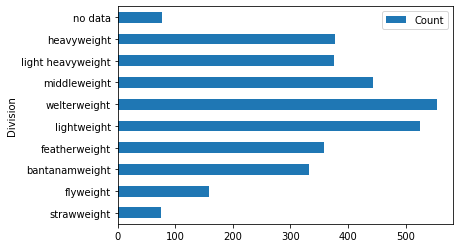

In [28]:
subCounts.plot(kind='barh', rot=0)

<h6 style="color:green">
    Interesting! we see that the most common weight division is welterweight and the smallest division is strawweight.
    I would like to do something similar for the height and age attributes of each fighter.
</h6>

<h2 style="color:black">
    Second Question: How does height distribution look like?
</h2>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b27f588>]],
      dtype=object)

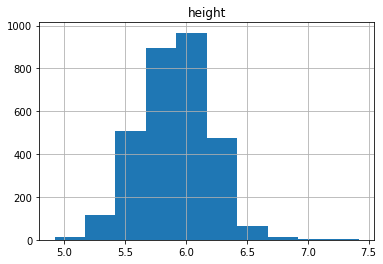

In [34]:
heightFrame =  pd.DataFrame(fighterFrame['height'])
heightFrame.hist(bins=10)

<h6 style="color:green">
    We can see in this 10-bin histogram that the most common heights in the UFC
    fall between 5.9 and 6.2 feet. This is interesting but too general; a better
    analysis would be to plot the height distribution of each fighting class.
</h6>
<h6 style="color:green"></h6>
<h2 style="color:black">
    Third question: how does the height distribution in each fighting class look like? 
</h2>
<p>Strawweight</p> 

In [46]:

strawweightFrame = dm.make_weight_division('strawweight')

TypeError: '>' not supported between instances of 'int' and 'NoneType'

<h6 style="color:green">
    
</h6>